# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import StringIO
import requests
import zipfile
import czipfile
import matplotlib as mpl
import seaborn as sns

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
import zipfile

#get the zip 
zf = zipfile.ZipFile('C:/Users/Arnaud/Downloads/lahman-csv_2014-02-14.zip', 'r')
#get the file names
files = zf.namelist()

#Extract all the files
#zf.extractall("C:/Users/Arnaud/Documents/CS109/Data")

#Save as dataframe
salaries = pd.read_csv("C:/Users/Arnaud/Documents/CS109/Data/Salaries.csv")
teams = pd.read_csv("C:/Users/Arnaud/Documents/CS109/Data/Teams.csv")

print salaries.head()
print teams.head()

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       So

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [29]:
print salaries.columns

print salaries.dtypes

Index([u'yearID', u'teamID', u'lgID', u'playerID', u'salary'], dtype='object')
yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object


In [125]:
#salaries.shape # (23956, 5)
group_salaries = salaries.groupby(['teamID','yearID'])
summarized_salaries = group_salaries['salary'].sum()

print summarized_salaries.shape
#828

(828L,)


In [123]:
print teams.head()
#(2745, 48)

   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       South End Grounds I         NaN   
3 NaN  0.85      Washington Olympics          Olympics Grounds         NaN   
4 NaN  0.83         New York Mutuals  Union Grounds (Brooklyn)         NaN   

   BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0  102   

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [130]:
#print teams.columns
#print summarized_salaries.dtypes
#convert serie to dataframe
summarized_salaries_df = summarized_salaries.to_frame()
new_df = pd.merge(teams, summarized_salaries_df,how='left',left_on=['teamID','yearID'],right_index=True)
#print new_df.columns
new_df[['teamID', 'yearID', 'W', 'salary']].head()
#2745, 4)

,teamID,yearID,W,salary
0,PH1,1871,21,NaN
1,CH1,1871,19,NaN
2,BS1,1871,20,NaN
3,WS3,1871,15,NaN
4,NY2,1871,16,NaN


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [218]:
#filter on the relevant columns
extract_df = new_df[['teamID', 'yearID', 'W', 'salary']]
#remove NaN rows
extract_df_notnull = extract_df.dropna()

#extract_df_notnull.shape (828, 4)#(828, 4)
#extract_df_notnull['yearID'].groupby(extract_df_notnull['yearID']).count()

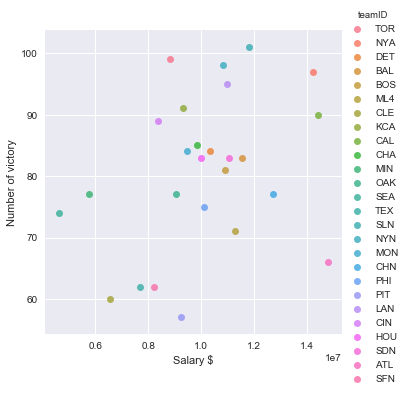

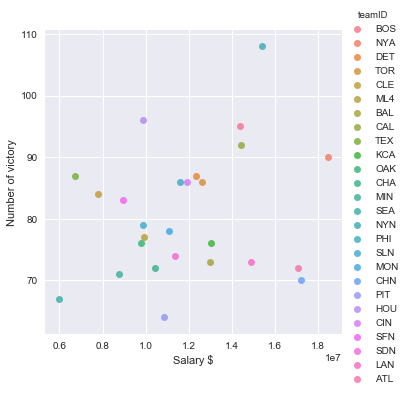

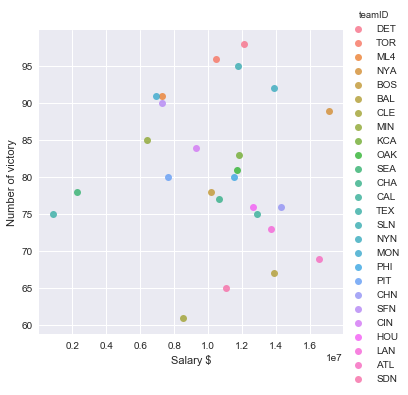

In [217]:
import seaborn as sns
sns.set()

#print extract_df_year.head()

for year in [1985,1986,1987]:
    extract_df_year = extract_df_notnull[extract_df_notnull['yearID'].isin([year])]
    g = sns.lmplot(x="salary", y="W", hue="teamID",
               truncate=True, size=5, data=extract_df_year)
    g.set_axis_labels("Salary $", "Number of victory")


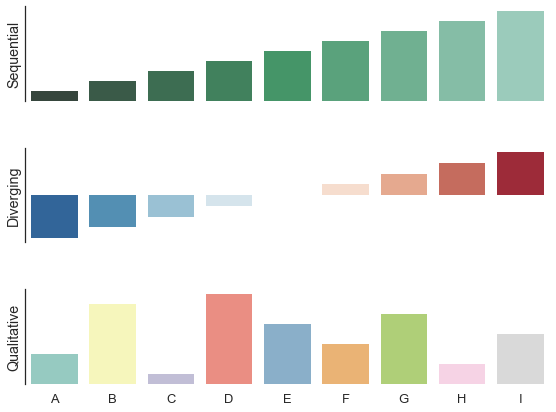

In [156]:
#Test seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


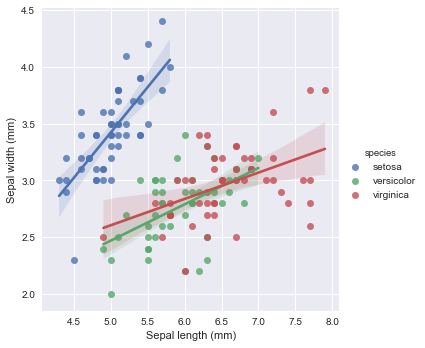

In [166]:
import seaborn as sns
sns.set()

# Load the example tips dataset
iris = sns.load_dataset("iris")
print iris.head()

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [5]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [3]:
path = 'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
countries = pd.read_csv(path)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [27]:
#Better way to do it
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
resp = requests.get(url)
resp_string = StringIO.StringIO(resp.content)
countries = pd.read_csv(resp_string)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [4]:
path_excel = 'C:/Users/Arnaud/Documents/CS109/Data/indicator gapminder gdp_per_capita_ppp.xlsx'
income = pd.read_excel(path_excel)
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [5]:
#print income.columns
#print income['GDP per capita']
#df.pivot(index='foo', columns='bar', values='baz')
income_newindex = income.set_index('GDP per capita')
income_transpose = income_newindex.transpose()
income_transpose.head()
income_transpose.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   

    ins_losses abbrev  
40      116.29     SC  
34      109.72     ND  
48      152.56     WV  
3       142.39     AR  
17      137.13     KY  


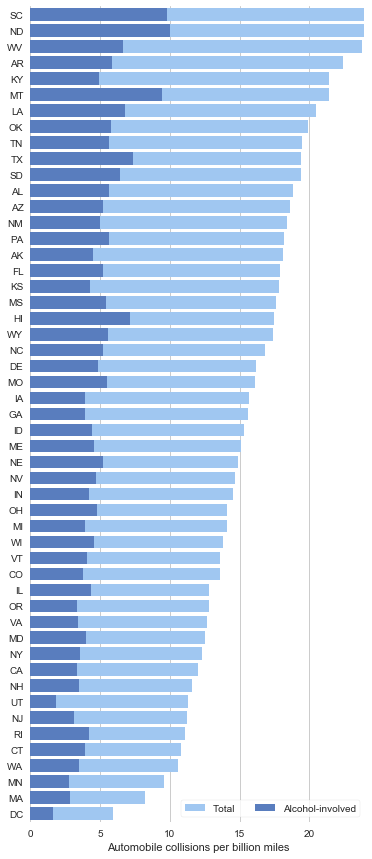

In [45]:
#test seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
print crashes.head()

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [28]:
#print income_transpose.columns
income_transpose_notnull = income_transpose.loc[2000].dropna()
income_transpose_notnull.index

Index([u'Afghanistan', u'Albania', u'Algeria', u'Andorra', u'Angola',
       u'Antigua and Barbuda', u'Argentina', u'Armenia', u'Aruba',
       u'Australia',
       ...
       u'Uruguay', u'Uzbekistan', u'Vanuatu', u'Venezuela',
       u'West Bank and Gaza', u'Vietnam', u'Yemen', u'Zambia', u'Zimbabwe',
       u'South Sudan'],
      dtype='object', name=u'GDP per capita', length=203)

In [29]:
income_transpose_notnull.head()

GDP per capita
Afghanistan      962.0
Albania         5305.0
Algeria         9885.0
Andorra        31662.0
Angola          3387.0
Name: 2000, dtype: float64

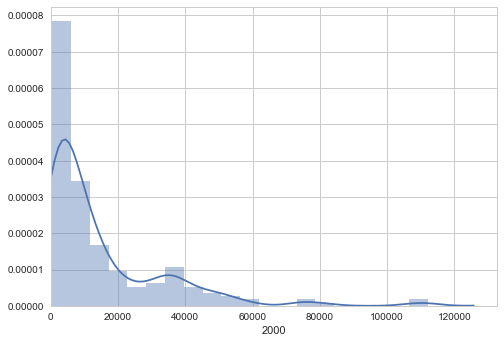

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.distplot(income_transpose_notnull);
sns.plt.xlim(0,);

[<matplotlib.text.Text at 0xcc6aac8>, <matplotlib.text.Text at 0xcc8d278>]

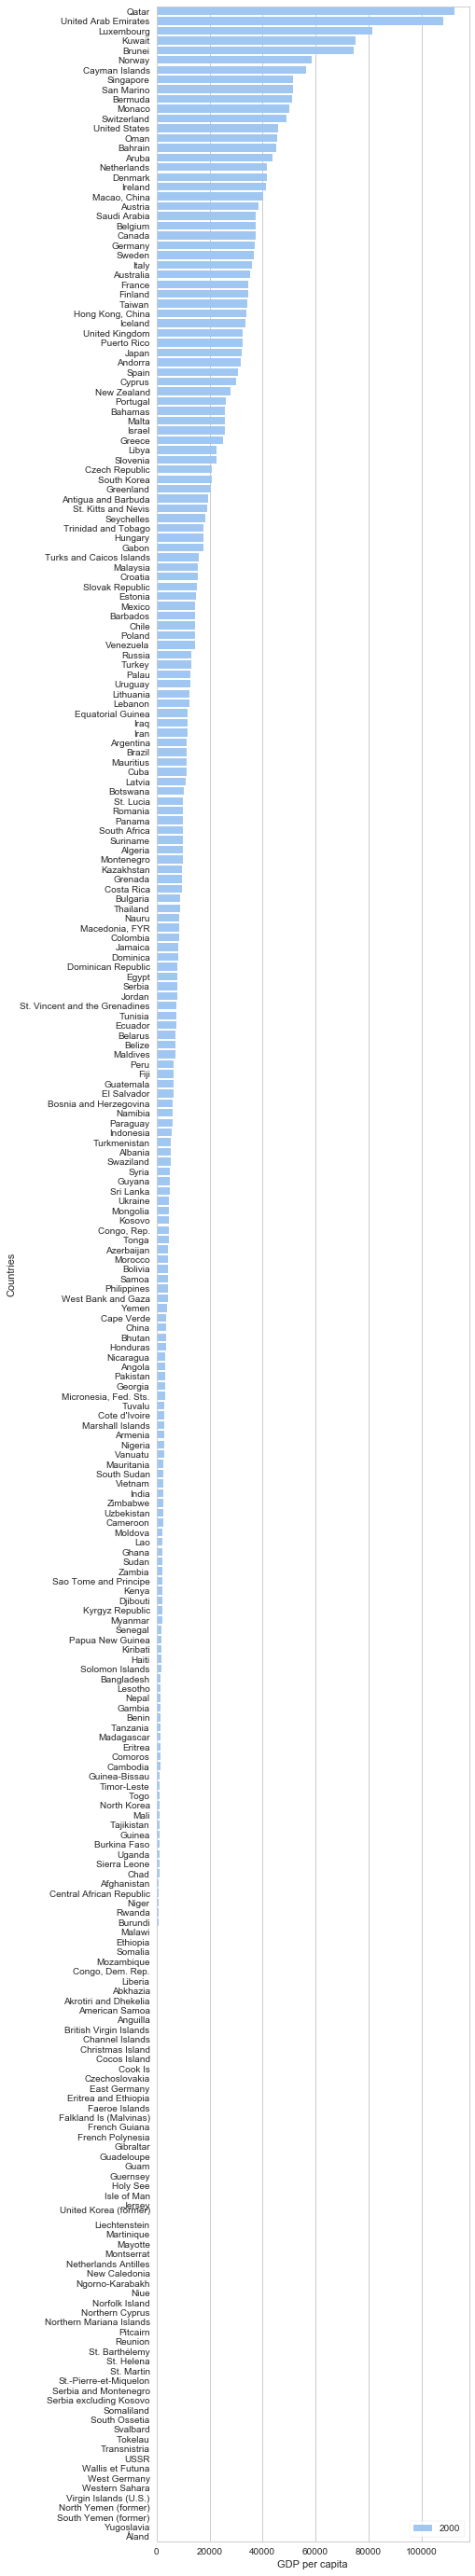

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#income.sort_values(2000, ascending=False)
f, ax = plt.subplots(figsize=(6, 50))
sns.set_color_codes("pastel")
sns.barplot(x=2000, y='GDP per capita',data=income.sort_values(2000, ascending=False),
            label=2000, color="b")

ax.legend(ncol=2, loc="lower right", frameon=True,)
ax.set(ylabel="Countries",
       xlabel="GDP per capita")




#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [7]:
#print countries.head()
income_year = income[['GDP per capita', 2000]]
print income_year.index


#new_df = pd.merge(countries, summarized_salaries_df,how='left',left_on=['teamID','yearID'],right_index=True)
#print new_df.columns


RangeIndex(start=0, stop=262, step=1)


In [8]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
def mergeByYear(year):
    income_year = income[['GDP per capita', year]]
    new_df = pd.merge(countries, income_year,how='left',left_on=['Country'],right_on=['GDP per capita'])
    df_final = new_df[['Country', 'Region', year]]
    df_final.columns = ['Country', 'Region', 'Income']
    return df_final

mergeByYear(2010).head()

,Country,Region,Income
0,Algeria,AFRICA,12494.0
1,Angola,AFRICA,7047.0
2,Benin,AFRICA,1637.0
3,Botswana,AFRICA,13642.0
4,Burkina,AFRICA,NaN


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

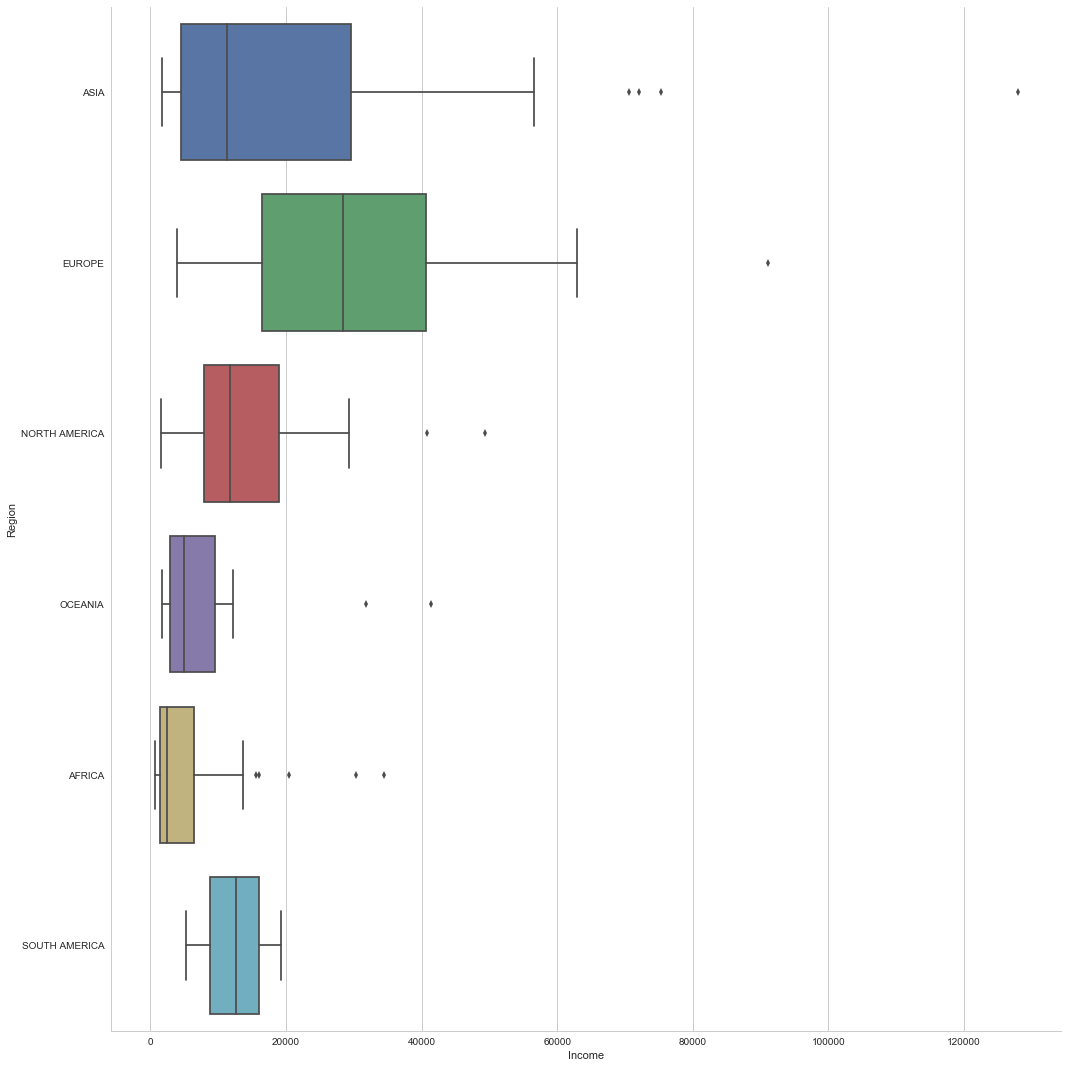

In [26]:
with sns.axes_style(style='whitegrid'):
    g = sns.factorplot("Income", "Region", data=mergeByYear(2010).sort_values('Income', ascending=False), kind="box",size=15, aspect=1)
    g.set_axis_labels("Income", "Region");

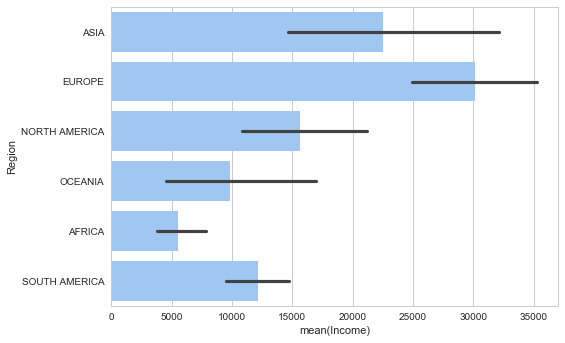

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#income.sort_values(2000, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x='Income', y='Region',data=mergeByYear(2010).sort_values('Income', ascending=False), color="b")



## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [3]:
from scipy import stats
n = stats.norm(loc=3.5, scale=2.0)
#print n.rvs()
print(stats.norm.__doc__)

A normal continuous random variable.

    The location (loc) keyword specifies the mean.
    The scale (scale) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    ``rvs(loc=0, scale=1, size=1, random_state=None)``
        Random variates.
    ``pdf(x, loc=0, scale=1)``
        Probability density function.
    ``logpdf(x, loc=0, scale=1)``
        Log of the probability density function.
    ``cdf(x, loc=0, scale=1)``
        Cumulative distribution function.
    ``logcdf(x, loc=0, scale=1)``
        Log of the cumulative distribution function.
    ``sf(x, loc=0, scale=1)``
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    ``logsf(x, loc=0, scale=1)``
        Log of the survival function.
   

0.15865525393145707

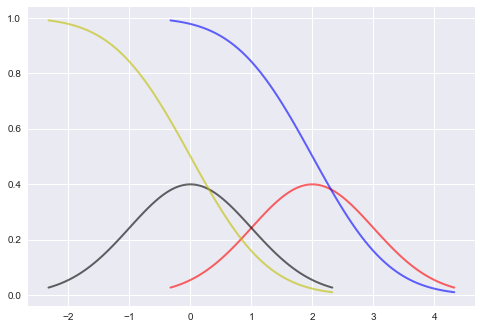

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#create normal distribution for x
x = np.linspace(norm.ppf(0.01, loc=2, scale =1),norm.ppf(0.99, loc=2, scale =1), 100)
ax.plot(x, norm.pdf(x, loc=2, scale=1),'r-', lw=2, alpha=0.6, label='norm pdf for x')

#create normal distribution for y
y = np.linspace(norm.ppf(0.01, loc=0, scale =1),norm.ppf(0.99, loc=0, scale =1), 100)
ax.plot(y, norm.pdf(y, loc=0, scale=1),'k-', lw=2, alpha=0.6, label='norm pdf for y')


#survival function for x
ax.plot(x, norm.sf(x, loc=2, scale=1),'b-', lw=2, alpha=0.6, label='survival function for x')

#survival function for x
ax.plot(y, norm.sf(y, loc=0, scale=1),'y-', lw=2, alpha=0.6, label='survival function for y')

norm.sf(3,loc = 2, scale=1)

True

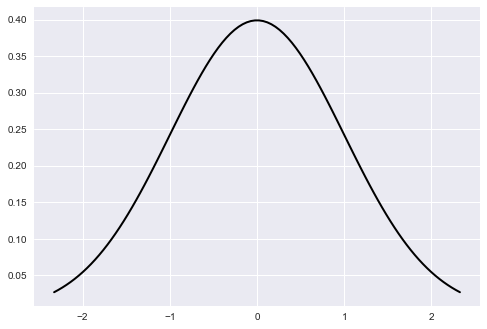

In [28]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
#ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')



rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

In [33]:
from scipy.stats import norm
import matplotlib.pyplot as plt

"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
def ratioNormals (diff, a):
    #define survival function for Y
    sfy = norm.sf(a ,loc = 0, scale = 1)
    #define survival function for X
    sfx = norm.sf(a ,loc = diff, scale = 1)
    ratio = sfx / sfy
    return ratio

ratioNormals( diff = 1, a = 2)


6.9738168680887602

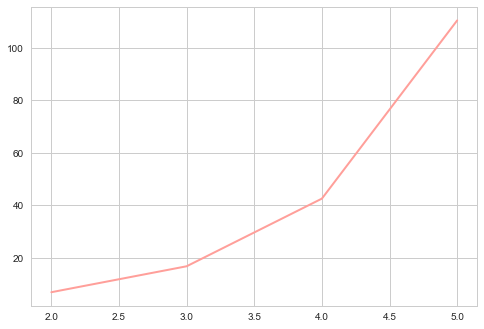

In [34]:
 #Show the curve for different value (a = 2,3,4 and 5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

A = [2,3,4,5]
ratio = [ratioNormals(diff = 1, a= l) for l in A]
ax.plot(A, ratio, 'r-', lw=2, label='diff in function of a')


#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [35]:
dataAfrica.columns
data.Region.unique()

NameError: name 'dataAfrica' is not defined

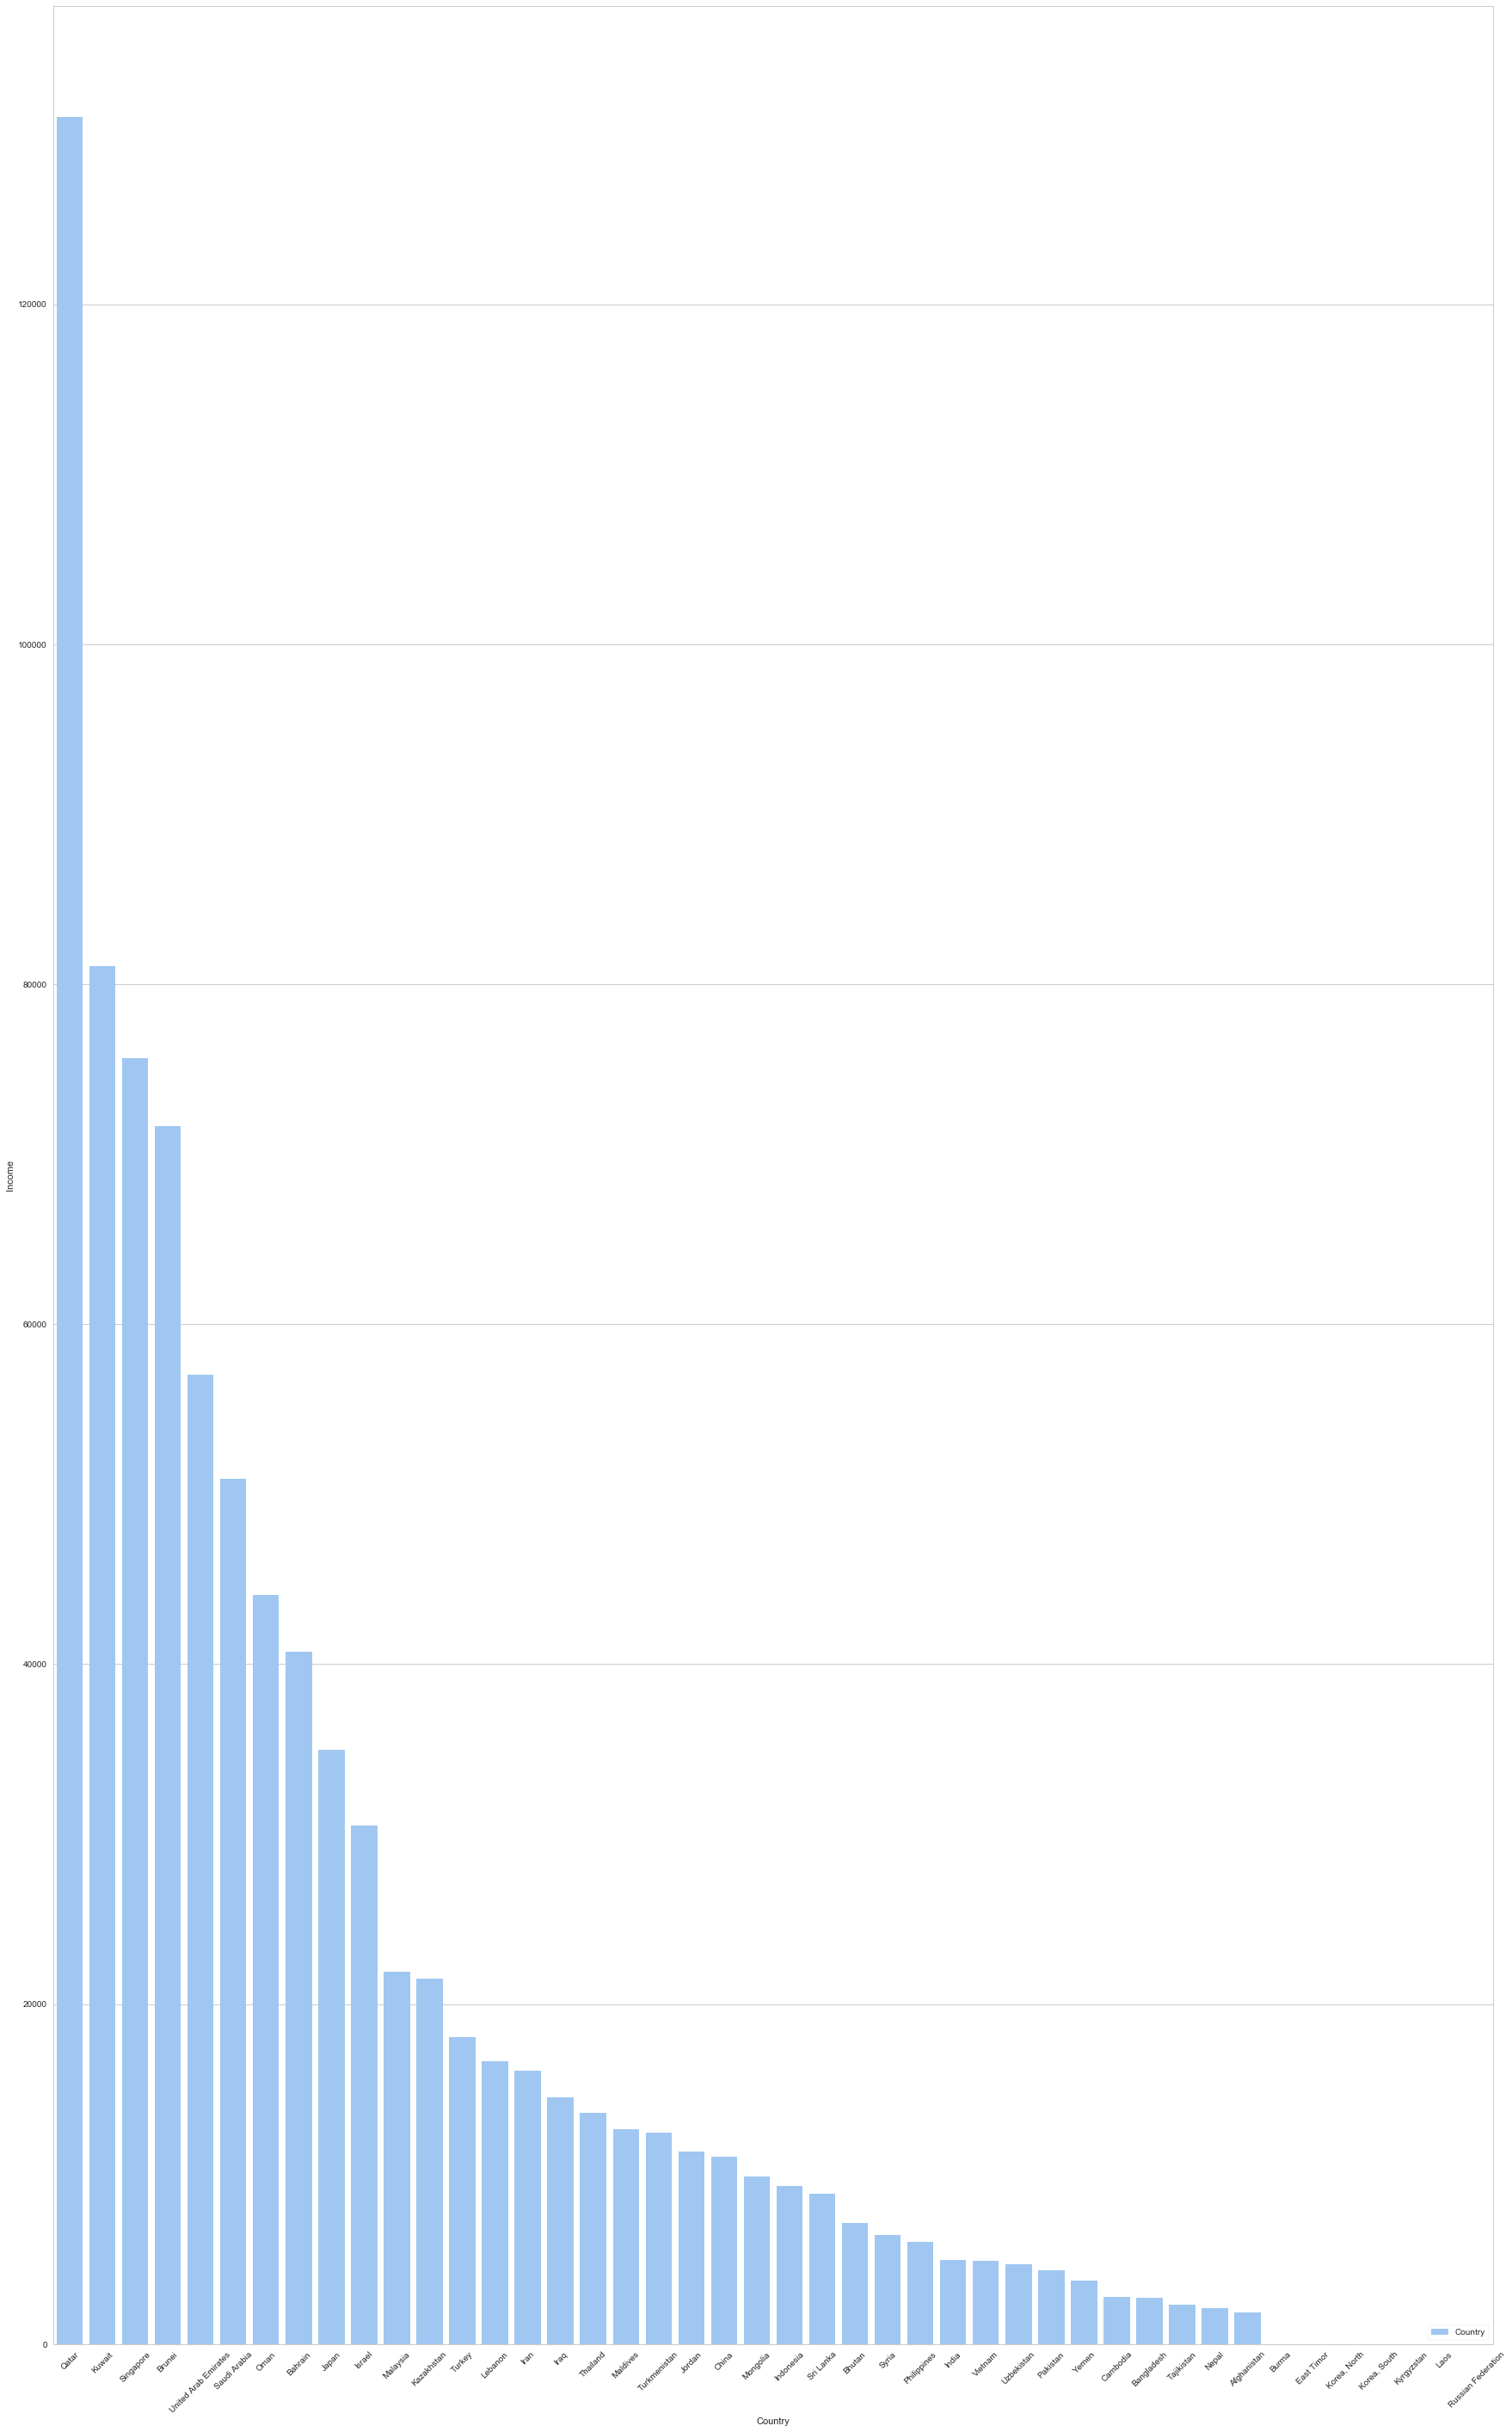

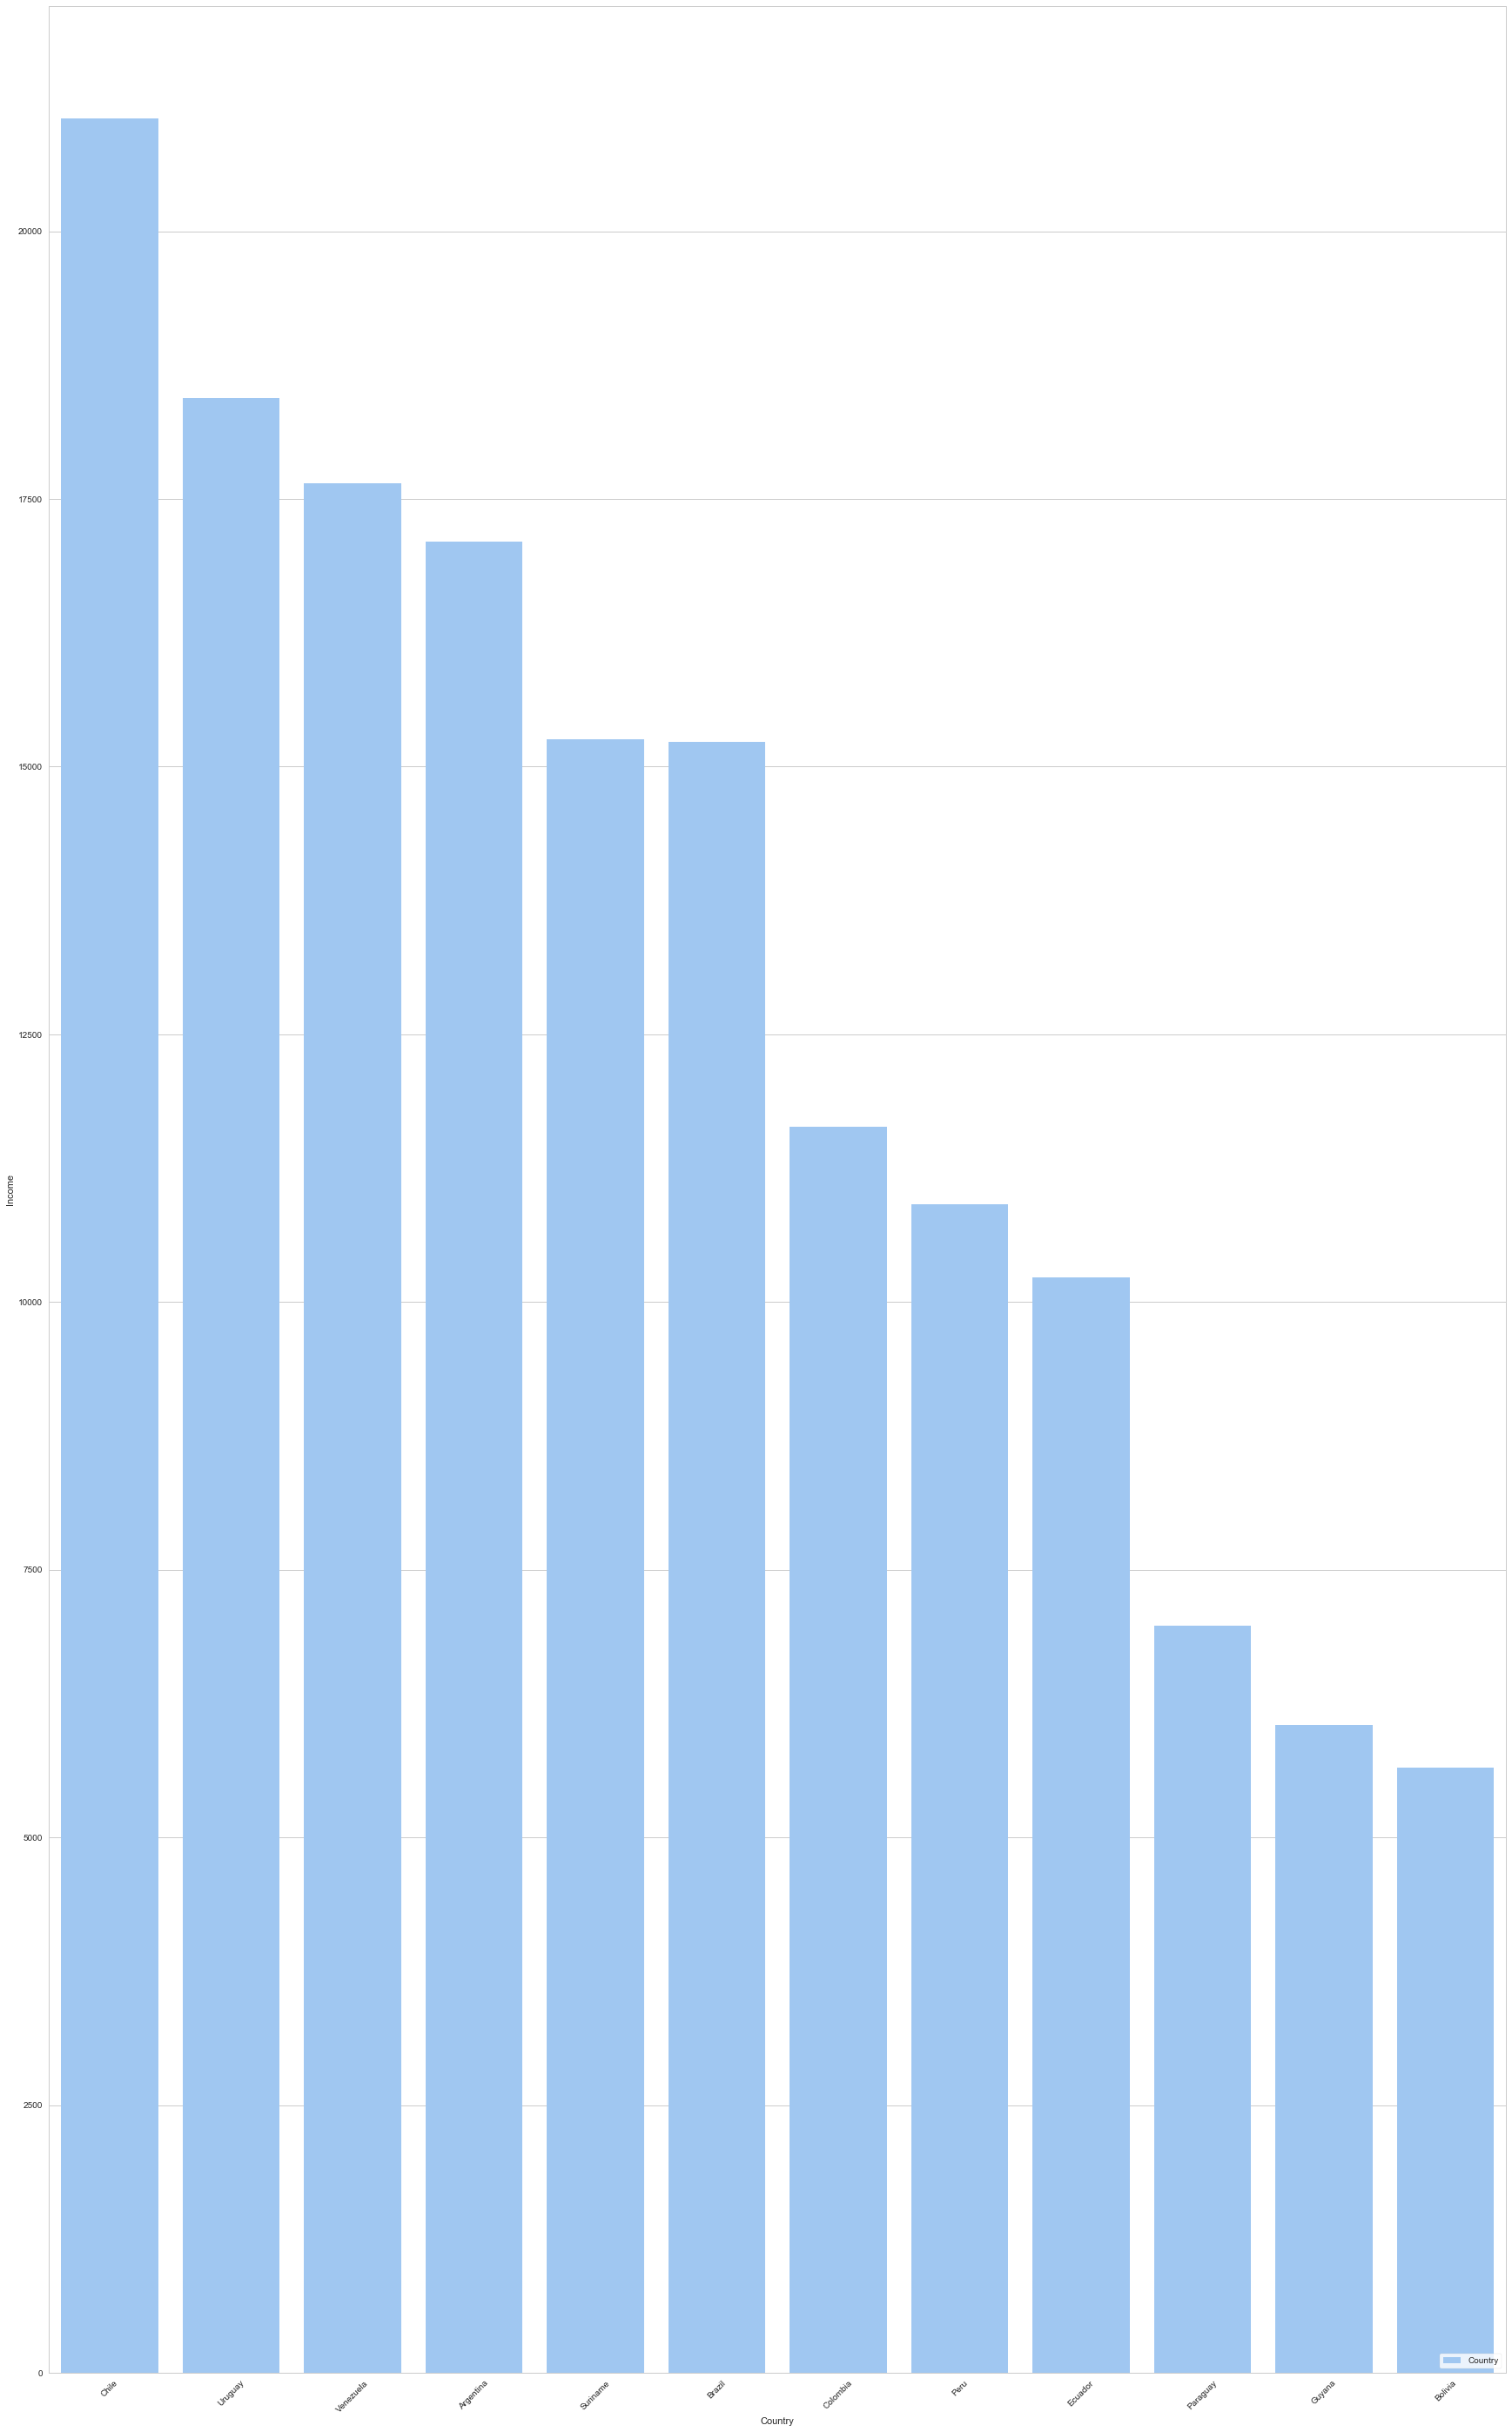

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

data= mergeByYear(2012)
def displayIncome(Country):
    #income.head()
    dataCountry = data[data['Region'] == Country]

    f, ax = plt.subplots(figsize=(30, 50))
    sns.set_color_codes("pastel")
    sns.barplot(x='Country', y='Income',data= dataCountry.sort_values('Income', ascending=False),
            label='Country', color="b")

    plt.xticks(rotation=45)
    ax.legend(ncol=2, loc="lower right", frameon=True,)
    ax.set(ylabel="Income",
           xlabel="Country")
    return

displayIncome('ASIA')
displayIncome('SOUTH AMERICA')



In [61]:
#get the average per region
print data.groupby('Region').mean()

print "Asia has a bigger average income than South America"

                     Income
Region                     
AFRICA          5601.220000
ASIA           23500.432432
EUROPE         30492.720930
NORTH AMERICA  16036.650000
OCEANIA        10481.153846
SOUTH AMERICA  13015.750000
Asia has a bigger average income than South America


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [32]:
#number of countries per region
datagrouped = data['Country'].groupby(data['Region']).count()
#print datagrouped
data10000 = data[data['Income']> 10000]
data10000grouped = data10000['Country'].groupby(data10000['Region']).count()

print data10000grouped/datagrouped*100
print data10000grouped

NameError: name 'data' is not defined

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
